In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x

# Hyperparameters
learning_rate = 0.001
batch_size = 64
num_epochs = 20
hidden_size = 128
input_size = 28 * 28  # MNIST image size (28x28)
output_size = 10  # Number of classes (0-9)

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 36.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.24MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 9.53MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.91MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
model = MLP(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def train_model():
    train_losses = []
    test_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for inputs, labels in trainloader:
            # Flatten the images
            inputs = inputs.view(inputs.size(0), -1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Calculate Training Loss and Test Accuracy
        avg_train_loss = running_loss / len(trainloader)
        train_losses.append(avg_train_loss)

        model.eval()
        correct = 0
        total = 0

        with torch.no_grad():
            for inputs, labels in testloader:
                inputs = inputs.view(inputs.size(0), -1)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_accuracy = 100 * correct / total
        test_accuracies.append(test_accuracy)

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")

    return train_losses, test_accuracies

In [ ]:
train_losses, test_accuracies = train_model()

Epoch [1/20], Loss: 1.6143, Test Accuracy: 90.68%
Epoch [2/20], Loss: 1.5412, Test Accuracy: 93.36%
Epoch [3/20], Loss: 1.5250, Test Accuracy: 94.67%
Epoch [4/20], Loss: 1.5147, Test Accuracy: 94.59%
Epoch [5/20], Loss: 1.5111, Test Accuracy: 94.73%
Epoch [6/20], Loss: 1.5072, Test Accuracy: 95.82%
Epoch [7/20], Loss: 1.5028, Test Accuracy: 96.19%
Epoch [8/20], Loss: 1.5004, Test Accuracy: 96.35%
Epoch [9/20], Loss: 1.4993, Test Accuracy: 95.95%
Epoch [10/20], Loss: 1.4976, Test Accuracy: 95.76%
Epoch [11/20], Loss: 1.4962, Test Accuracy: 96.08%
Epoch [12/20], Loss: 1.4945, Test Accuracy: 96.15%
Epoch [13/20], Loss: 1.4947, Test Accuracy: 95.86%
Epoch [14/20], Loss: 1.4939, Test Accuracy: 96.77%
Epoch [15/20], Loss: 1.4931, Test Accuracy: 96.45%
Epoch [16/20], Loss: 1.4903, Test Accuracy: 96.64%
Epoch [17/20], Loss: 1.4906, Test Accuracy: 96.43%
Epoch [18/20], Loss: 1.4897, Test Accuracy: 96.41%
Epoch [19/20], Loss: 1.4885, Test Accuracy: 96.95%
Epoch [20/20], Loss: 1.4897, Test Accura

In [ ]:
epochs = np.arange(1, num_epochs + 1)
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

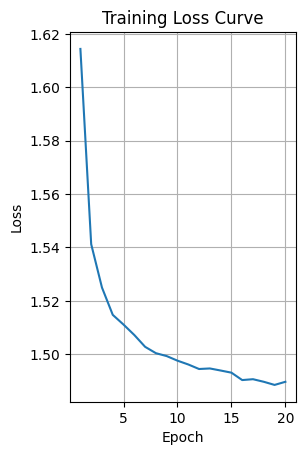

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.grid(True)

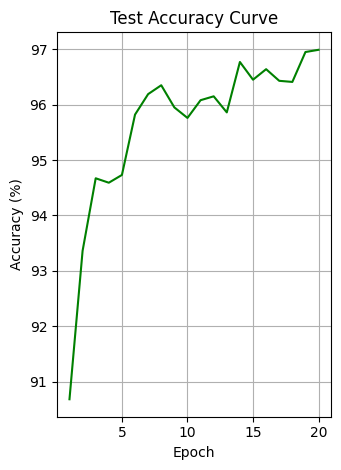

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(epochs, test_accuracies, label='Test Accuracy', color='g')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Curve')
plt.grid(True)

plt.tight_layout()
plt.show()

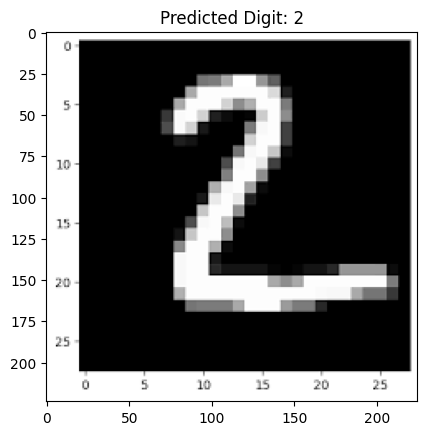

Predicted Digit: 2


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Function to Load and Preprocess the Image
def preprocess_image(image_path):
    # Open the image
    image = Image.open(image_path).convert('L')  # Convert to grayscale

    # Transform the image to tensor and normalize it (same as during training)
    transform = transforms.Compose([transforms.Resize((28, 28)),   # Resize to 28x28 (MNIST size)
                                   transforms.ToTensor(),         # Convert to Tensor
                                   transforms.Normalize((0.5,), (0.5,))])  # Normalize

    image = transform(image)
    image = image.view(1, -1)  # Flatten the image (28*28 = 784 pixels)

    return image

# Load the trained model (assuming it's already trained and in memory)
model.eval()  # Set the model to evaluation mode

# Function to Recognize Numbers
def recognize_number(image_path):
    image = preprocess_image(image_path)

    # Make the prediction
    with torch.no_grad():  # No need to track gradients during inference
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)  # Get the class with the highest probability

    return predicted.item()

# Test the model on a new image (provide the path to your image file)
image_path ='/content/two_image.png'  # Change this to the correct path of your image
predicted_digit = recognize_number(image_path)

# Display the image and predicted digit
image = Image.open(image_path)
plt.imshow(image, cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.show()

print(f"Predicted Digit: {predicted_digit}")
